## **Business Problem Understanding**

**Context**

Dalam era digital yang terus berkembang, industri e-commerce telah menjadi salah satu pilar utama dalam perekonomian global. Perusahaan e-commerce menyediakan platform yang memungkinkan pelanggan untuk melakukan pembelian secara online dengan kenyamanan dan kemudahan. Perkembangan industri e-commerce ini didukung oleh meningkatnya penggunaan internet dan penggunaan smartphone di masyarakat. Namun, di tengah perkembangan tersebut, perusahaan ecommerce juga menghadapi tantangan, salah satunya adalah masalah churn atau kehilangan pelanggan.

Churn adalah suatu fenomena di mana pelanggan berhenti menggunakan produk atau layanan ecommerce karena berbagai alasan, seperti harga yang terlalu tinggi, kualitas produk atau layanan yang tidak memuaskan, pelayanan pelanggan yang buruk, persaingan yang ketat, atau perubahan kebutuhan pelanggan. Oleh karena itu, Churn merupakan sebuah tantangan yang dihadapi oleh perusahaan dengan bisnis E-Commerce, karena dapat menyebabkan kehilangan pendapatan, peningkatan biaya untuk mendapatkan pelanggan baru, dan penurunan kepuasan pelanggan.

Penanganan yang efektif terhadap churn menjadi suatu kebutuhan mendesak bagi perusahaan. Perusahaan E-Commerce harus memahami faktor-faktor apa saja yang mempengaruhi pelanggan untuk churn. Setelah memahami faktor tersebut, perusahaan dapat mengambil langkah marketing atau inovasi lainnya yang sesuai untuk mengurangi Churn. Sehingga perusahaan E-Commerce dapat mengoptimalkan retensi pelanggan, meningkatkan kepuasan pelanggan, dan pada akhirnya, mencapai pertumbuhan berkelanjutan di tengah persaingan yang semakin ketat.

Target :
<br>
0 : pelanggan yang tetap/ setia menggunakan E-commerce 
<br>
1 : pelanggan yang berhenti menggunakan E-commerce/ keluar

**Problem Statement**

Perusahaan E-commerce menghadapi tantangan yang signifikan terkait adanya Churn pada perusahaan ini. Churn atau kehilangan pelanggan menjadi isu strategis yang mempengaruhi pendapatan perusahaan. Hal tersebut dikarenakan jika tingkat Churn semakin meningkat, maka pendapatan perusahaan akan semakin berkurang. Keberlanjutan bisnis e-commerce sangat bergantung pada pelanggan yang setia belanja di E-commerce ini, sehingga penting untuk meminimalisir terjadinya Churn. Selain itu, perusahaan juga harus lebih efisien dalam menentukan pengeluarannya, maka perusahaan harus mengetahui mana saja pelanggan yang berpotensi Churn/ tidak yang berguna untuk mengambil langkah marketing yang sesuai pada tiap customer.

Sehingga terdapat beberapa pertanyaan yang perlu dipecahkan :

1. **Identifikasi Faktor Churn**
<br>
Apa saja faktor- faktor yang mempengaruhi keputusan pelanggan untuk meninggalkan platform E-commerce (Churn)?

2. **Pengembangan Model Prediksi**
<br>
Bagaimana perusahaan dapat mengembangkan model prediksi yang efektif untuk menidentifikasi pelanggan yang perpotensi Churn?

**Goals**

Maka berdasarkan permasalahan tersebut, perusahaan harus menyelidiki lebih lanjut terkait Churn yang dialami oleh E-Commerce ini. Dengan memahami alasan dibalik pelanggan yang Churn, perusahaan akan dapat mencari solusi yang tepat untuk menangani masalah ini. Oleh karena itu, perusahaan harus mengetahui faktor apa saja yang membuat pelanggan tetap berbelanja atau berhenti pada E-Commerce ini. Kemudian perusahaan juga membutuhkan alat untuk memprediksi kemungkinan pelanggan akan churn/ tidak, yaitu dengan membuat model prediksi. Dengan membangun model tersebut memungkinkan perusahaan untuk mengambil tindakan pencegahan terhadap pelanggan yang berpotensi churn.  Tujuan ini diupayakan tercapai agar dapat mengatasi masalah Churn dalam perusahaan E-Commerce ini, meningkatkan pendapatan perusahaan, dan meningkatkan retensi pelanggan.

**Analytics Approach**

Kami akan menganalisis data untuk menemukan pola yang mebedakan customer yang berpotensi churn/ tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat mendeteksi apakah customer tersebut akan churn/ tidak.

**Metric Evaluation**

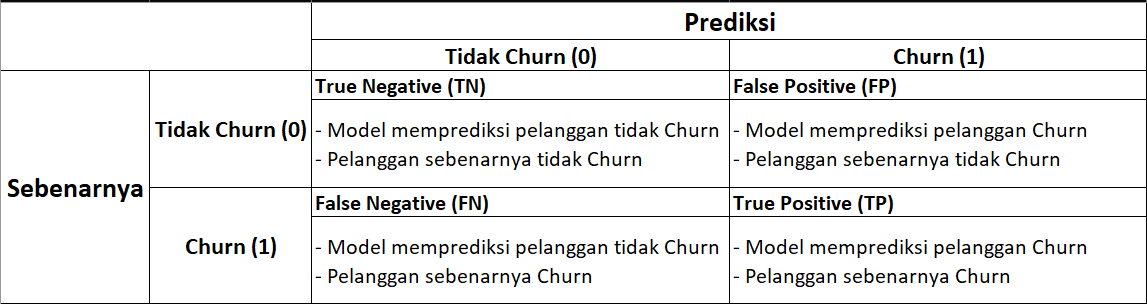

**Type error 1: False Positive**
<br>
Kondisi dan Dampak : Dalam konteks prediksi Churn, Type Error 1 terjadi ketika model memprediksi bahwa seorang pelanggan akan Churn, tetapi kenyataannya, pelanggan tersebut tidak meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini adalah perusahaan mungkin mengambil langkah-langkah pencegahan yang tidak diperlukan, seperti memberikan promosi kepada pelanggan yang sebenarnya tidak berencana untuk meninggalkan platform. Ini dapat mengakibatkan peningkatan biaya promosi tanpa mendapatkan manfaat yang sepadan. Namun, pelanggan tersebut mungkin akan meningkatkan transaksi belanjanya di platform E-commerce ini.


**Type error 2: False Negative**
<br>
Kondisi dan Dampak : Dalam hal Type Error 2, model memprediksi bahwa pelanggan tidak akan Churn, padahal kenyataannya, pelanggan tersebut benar-benar meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini lebih serius karena perusahaan kehilangan pelanggan dan pendapatan yang mungkin dapat dipertahankan atau ditingkatkan melalui langkah-langkah pencegahan. Perusahaan menjadi tidak mengambil tindakan yang diperlukan untuk mempertahankan hubungan dengan pelanggan yang sebenarnya berpotensi untuk Churn.

Berdasarkan dampak yang terjadi akibat kesalahan prediksi oleh model, fokus utama adalah pada mengurangi False Negative (FN). Kesalahan FN memiliki dampak yang lebih besar pada perusahaan dibandingkan FP, sehingga kami mengutamakan Recall sebagai metrik evaluasi model. Perusahaan akan lebih berorientasi untuk mengidentifikasi pelanggan yang berpotensi Churn, bahkan jika ada sedikit kesalahan dalam memprediksi pelanggan yang sebenarnya tidak Churn. Ini memberikan perusahaan kesempatan untuk mengambil tindakan preventif dan mempertahankan pelanggan, yang dapat mengurangi kerugian pendapatan akibat Churn.


## **Data Understanding**

Dataset source : <https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data>

Note :
- Dataset tidak seimbang antara yang Churn dengan yang tidak Churn
- Setiap baris merepresentasikan informasi terkait pelanggan yang berbelanja di platform E-Commerce

**Atribute Information**


| **Data** | **Variable** | **Description** |
|:---:|:---:|:---:|
| E Comm | CustomerID | ID unik pelanggan |
| E Comm | Churn | Tanda Churn |
| E Comm | Tenure | Masa pelanggan bergabung dalam organisasi |
| E Comm | PreferredLoginDevice | Perangkat login yang disukai pelanggan |
| E Comm | CityTier | Tingkatan kota |
| E Comm | WarehouseToHome | Jarak antara gudang ke rumah pelanggan |
| E Comm | PreferredPaymentMode | Metode pembayaran yang disukai pelanggan |
| E Comm | Gender | Jenis kelamin pelanggan |
| E Comm | HourSpendOnApp | Jumlah jam yang dihabiskan pelanggan di aplikasi seluler atau situs web |
| E Comm | NumberOfDeviceRegistered | Total jumlah perangkat yang terdaftar pada pelanggan tertentu |
| E Comm | PreferedOrderCat | Kategori pesanan yang disukai pelanggan dalam sebulan terakhir |
| E Comm | SatisfactionScore | Skor kepuasan pelanggan terhadap layanan |
| E Comm | MaritalStatus | Status pernikahan pelanggan |
| E Comm | NumberOfAddress | Total jumlah alamat yang ditambahkan pada pelanggan tertentu |
| E Comm | Complain | Ada/ tidak keluhan yang diajukan dalam sebulan terakhir |
| E Comm | OrderAmountHikeFromlastYear | Persentase peningkatan pesanan dari tahun lalu |
| E Comm | CouponUsed | Total jumlah kupon yang digunakan dalam sebulan terakhir |
| E Comm | OrderCount | Total jumlah pesanan dalam sebulan terakhir |
| E Comm | DaySinceLastOrder | Hari sejak pesanan terakhir oleh pelanggan |
| E Comm | CashbackAmount | Rata-rata cashback dalam sebulan terakhir |

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('E_Commerce_Dataset.csv')
display(df.head(), df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


The table above shows the top 5 and bottom 5 data entries from our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## **Numerical Data Checking**

In [5]:
# Indentify each numerical data range
df.describe().loc[['min','max']]

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
min,50001.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,11.0,0.0,1.0,0.0,0.0
max,55630.0,1.0,61.0,3.0,127.0,5.0,6.0,5.0,22.0,1.0,26.0,16.0,16.0,46.0,325.0


All numerical data range is appropriate, this checking is necessary to prevent any inappropriate values such as negative in numbers of days or negative numbers of object counts.

## **Categorical Data Checking**

In [6]:
# Print each unique categorical data to check any typo or any same type category with different names.

unique_dict = {}

for col in df.columns:                                                  # Search for unique categorical data by looping and save it in a dictionary
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        unique_dict[col] = df[col].unique()

for col, unique in unique_dict.items():                                 # Print each unique categorical data by looping
    print(f"'{col}' unique:\n{unique}\n")

'PreferredLoginDevice' unique:
['Mobile Phone' 'Phone' 'Computer']

'PreferredPaymentMode' unique:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

'Gender' unique:
['Female' 'Male']

'PreferedOrderCat' unique:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

'MaritalStatus' unique:
['Single' 'Divorced' 'Married']



There is not any typo but there is some category of same type but with different names. We need to replace it's name and make it to one category type.

In [7]:
# Replace any category of same type into one category type

# PreferredLoginDevice Category
df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'], inplace=True)

# PreferredPaymentMode Category
df['PreferredPaymentMode'].replace(['CC'],['Credit Card'],inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'],['COD'],inplace=True)

# PreferedOrderCat Category
df['PreferedOrderCat'].replace(['Mobile'],['Mobile Phone'],inplace=True)


## **Duplicated Data**

In [8]:
df.duplicated().sum()

0

There is no duplicated data.

# **Outliers**

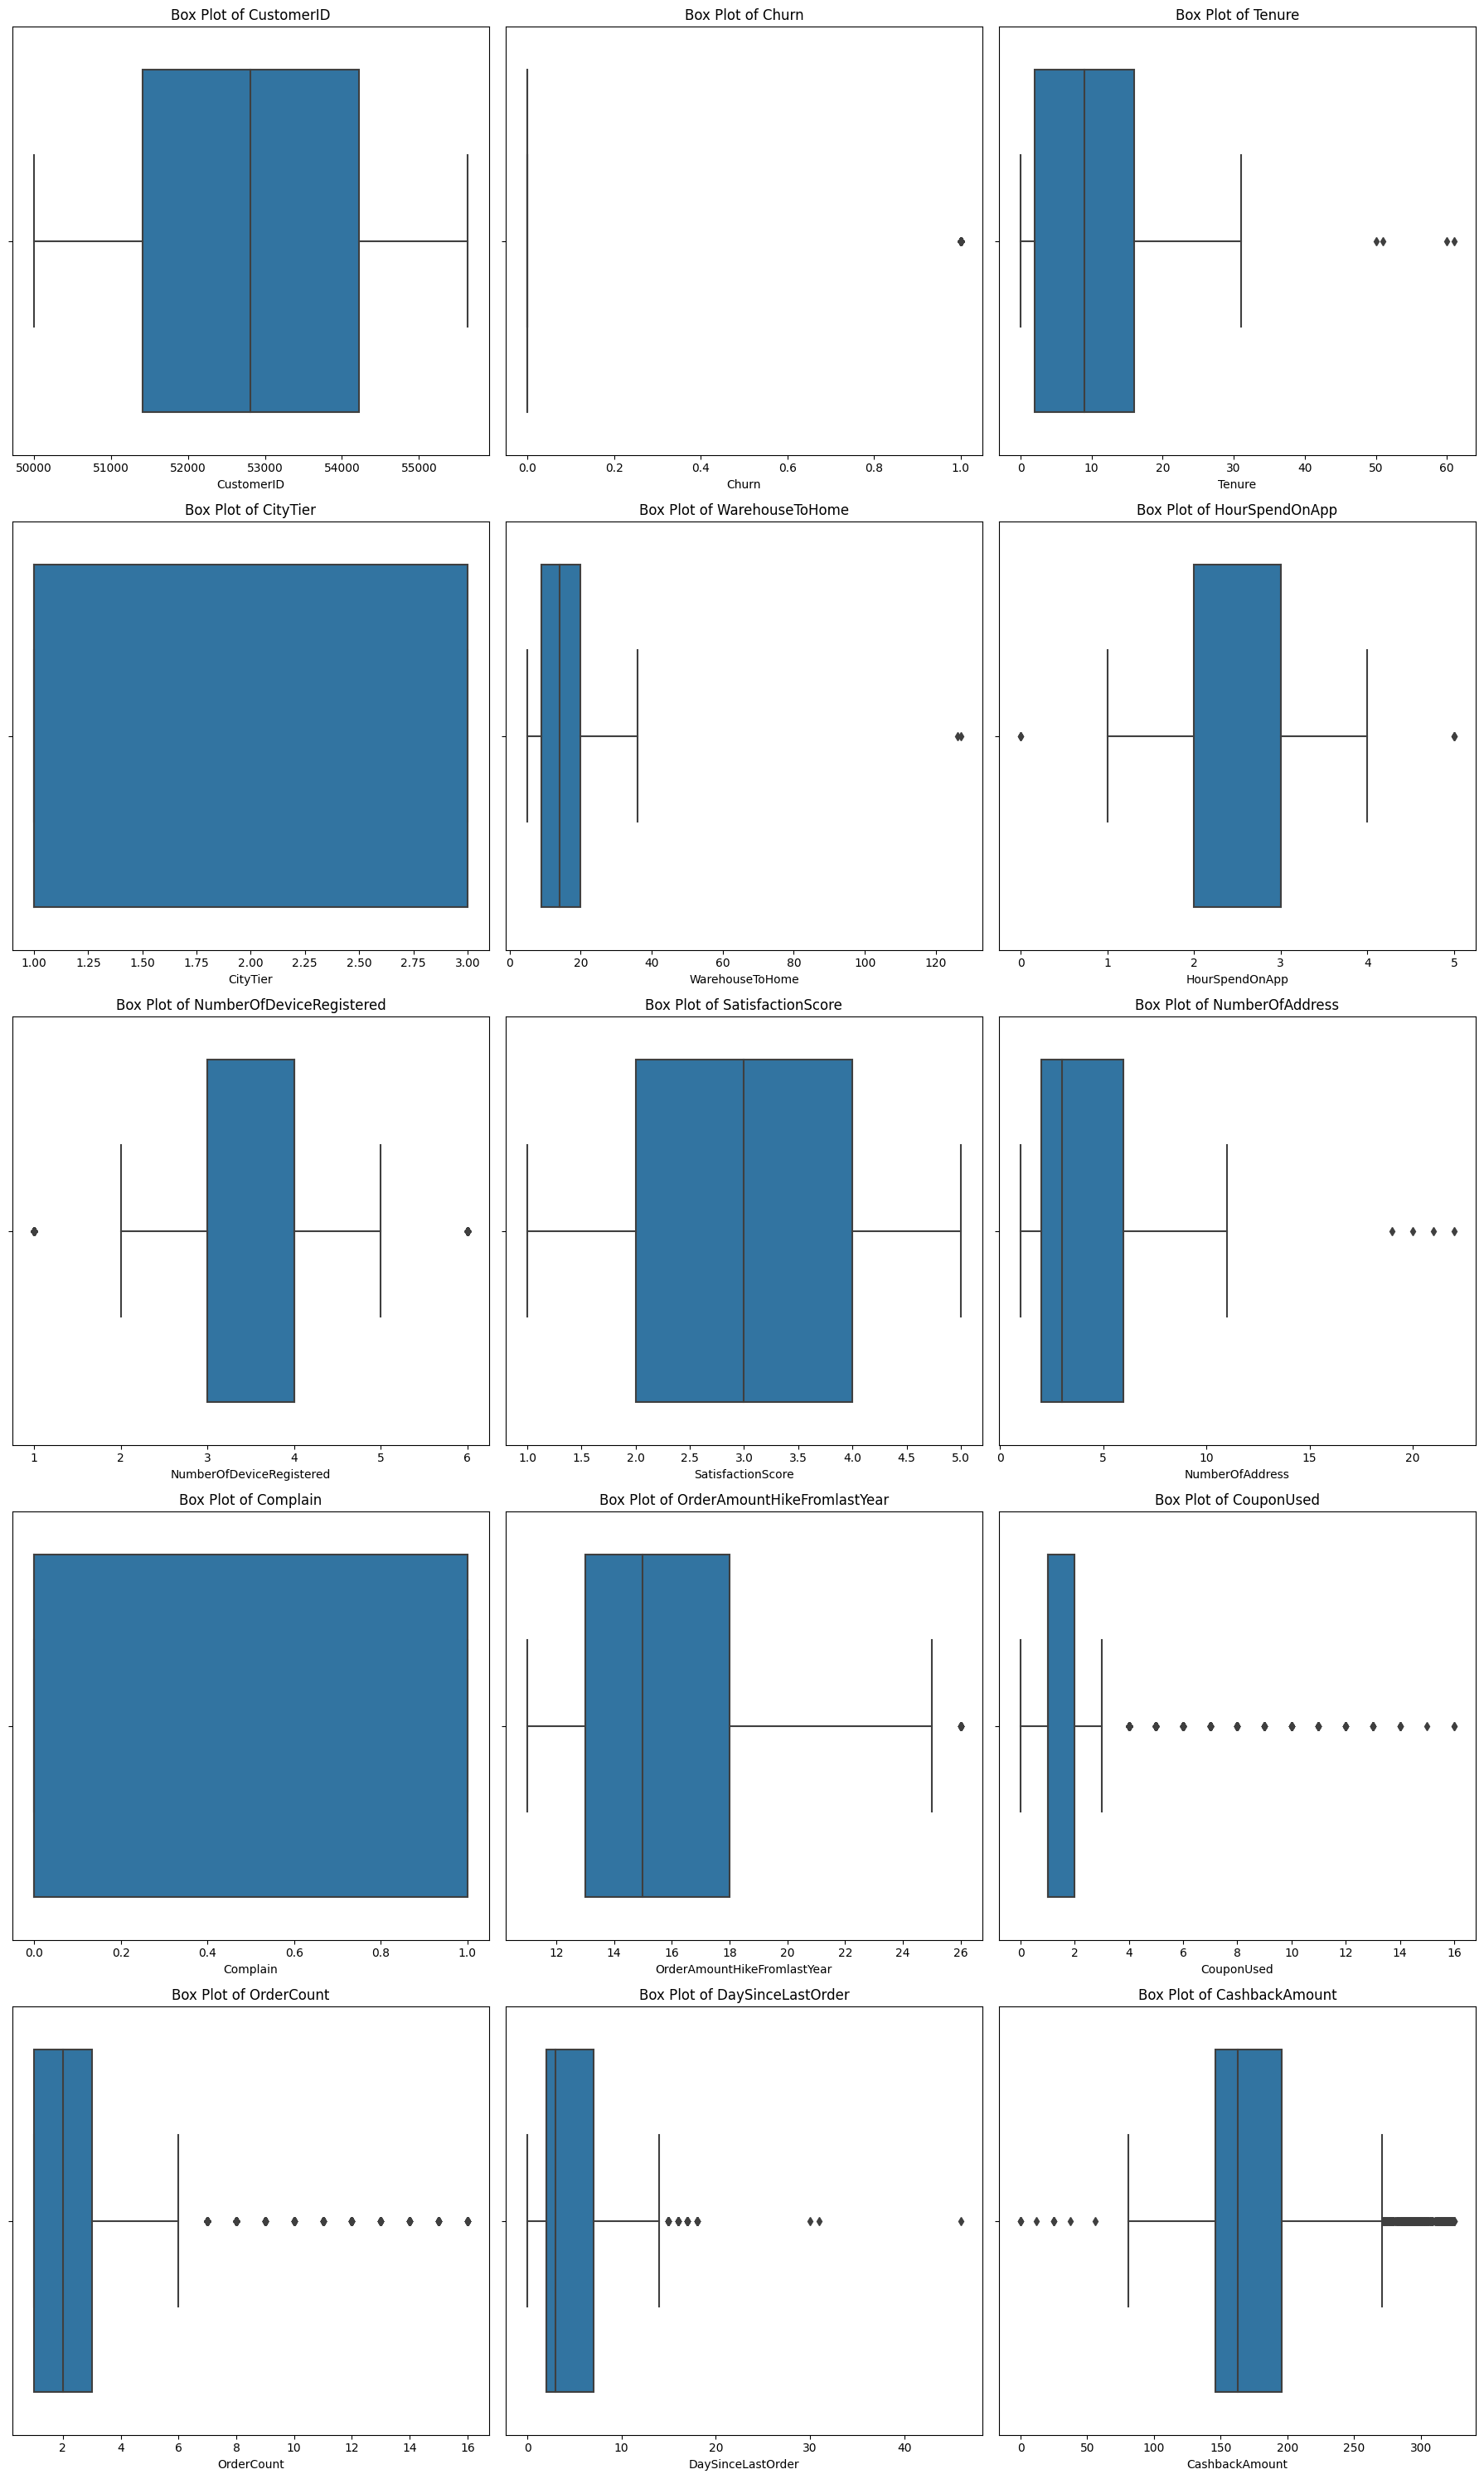

In [9]:
def numerical_boxplots(data):                                                           # Define function to create boxplot for each numerical data
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):                                      # Create boxplot for each numerical data by looping
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)

From each boxplot above, there isn't any necessity to remove outliers. This is because all the values contain valuable information that doesn't affect classification negatively.

## **Missing Values**

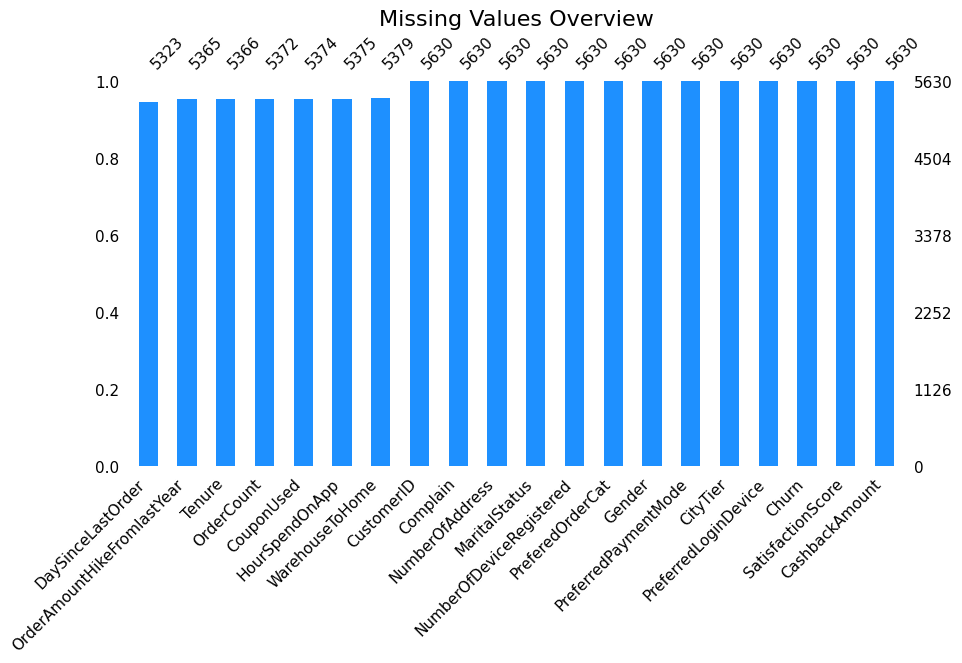

In [10]:
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=11)
plt.title('Missing Values Overview', fontsize=16);

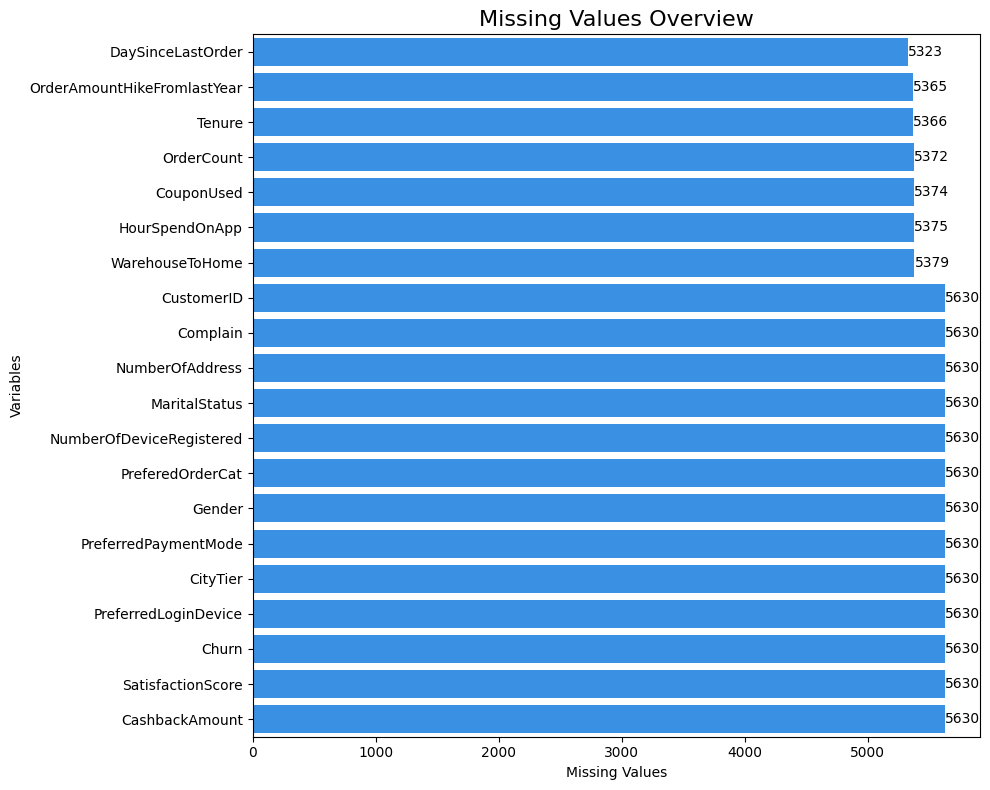

In [15]:
# number of values per column
missing_values = pd.DataFrame(df.count()).reset_index()
missing_values = missing_values.rename(columns={'index':'Variables',
                                        0:'Missing Values'}).sort_values('Missing Values', ascending=True)

# plotting overview
plt.figure(figsize=(10,8))
ax = sns.barplot(missing_values, y='Variables', x='Missing Values', color='dodgerblue')

for index, value in enumerate(missing_values['Missing Values']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
    
plt.title('Missing Values Overview', fontsize=16)

plt.tight_layout();

<Axes: >

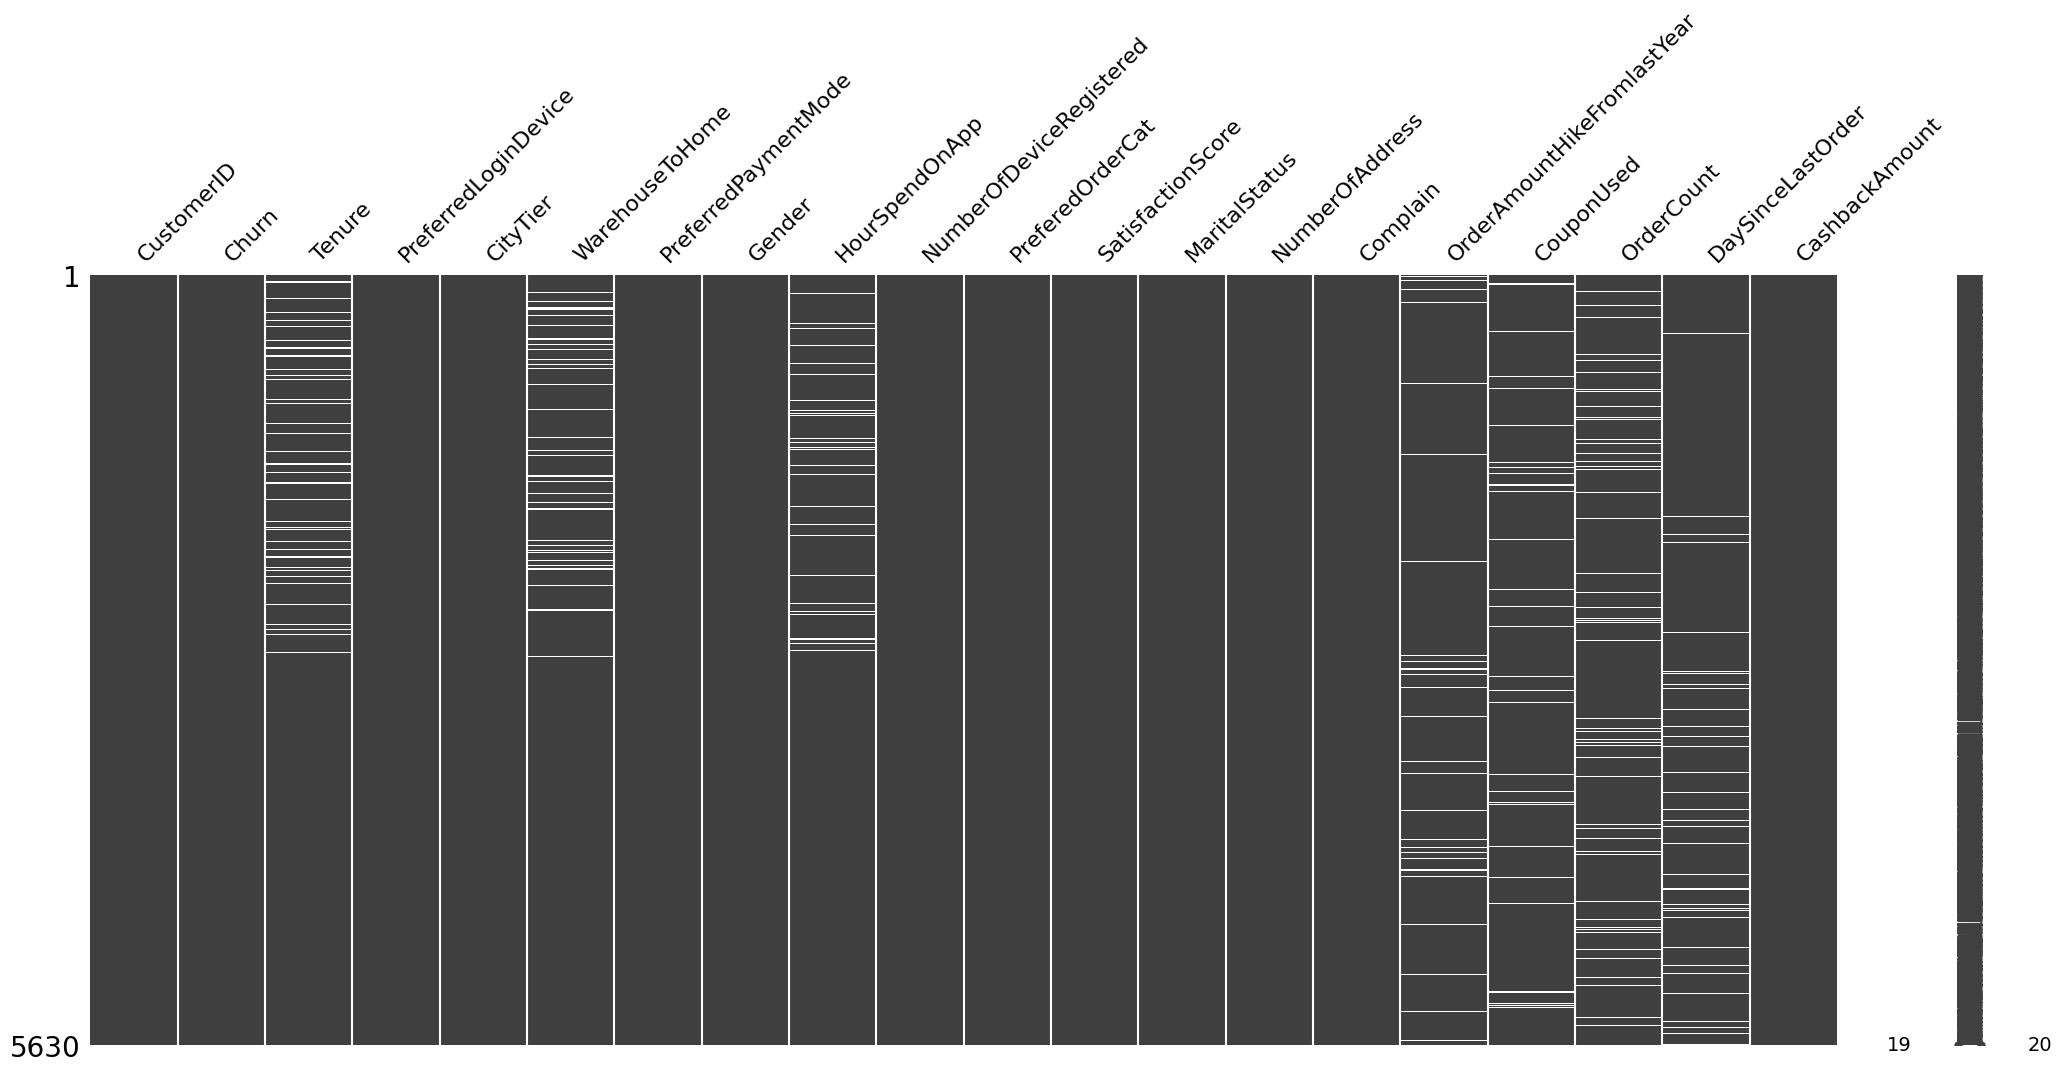

In [12]:
msno.matrix(df)

Although the number of missing values is relatively significant per column, however, the missing values are largely spread out across various variables. <br> Furthermore, all of the missing values are numerical values, and there are no missing categorical values. <br> Therefore, these missing values will be imputed by the median values of each column.

In [18]:
# numeric columns only
num_cols = df.select_dtypes(include=['float64','int64']).columns

# fillna numeric columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [19]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64